# Adult Dataset
##### The Adult Data Set contains the record of the workers. The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data. The target variable of this dataset is Income. On given attributes, the aim is to predict the annual income of a individual whether it is less than, greater than or equal to 50K.
##### There are a total of 48,842 rows and 15 attributes including target attribute(income).
##### The dataset contains missing values that are marked with a question mark character (?).
##### The given dataset has both categorical and numeric variables. -There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. 
###### -'>50K' : majority class, approximately 25%.
###### -'<=50K': minority class, approximately 75%.

## load the data

In [33]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
sbn.set_style("whitegrid");
import warnings
warnings.filterwarnings('ignore')

In [71]:
a=pd.read_csv('adults.csv')
b=pd.read_csv('adults.csv')

In [35]:
a.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Analysing statistical data

In [36]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [37]:
miss=['?']
a=pd.read_csv('adults.csv',na_values=miss)
a.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [38]:
a.shape

(48842, 15)

## Missing values

In [39]:
a.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [40]:
print('missing values in column- ',a.isnull().any(axis=0).sum())
print("missing values in rows- ",a.isnull().any(axis=1).sum())

missing values in column-  3
missing values in rows-  3620


## Handling missing values

In [41]:
round(100*(a.isnull().sum()/len(a.index)),1)

age                0.0
workclass          5.7
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         5.8
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     1.8
income             0.0
dtype: float64

In [42]:
a[a.isnull().sum(axis=1)>=1]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [44]:
a=a[a.isnull().sum(axis=1)<=1]
round(100*(a.isnull().sum()/len(a.index)),2)

age                0.00
workclass          0.00
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         0.02
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.76
income             0.00
dtype: float64

In [45]:
a[a.isnull().sum(axis=1)>=1]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,NaN,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,NaN,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48694,45,Private,199590,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,NaN,<=50K
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K


In [ ]:
a=a.drop('fnlwgt',axis=1)

In [49]:
a.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,46043,46043,46033,46043,46043,46043,45232,46043
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,14974,21452,6172,19005,39451,31121,41302,34621


## Treating missing values

In [50]:
a['occupation'].fillna("Prof-specialty", inplace= True)
round(100*(a.isnull().sum()/len(a.index)),2)

age                0.00
workclass          0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         0.00
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.76
income             0.00
dtype: float64

In [51]:
a['native-country'].fillna("United-States", inplace= True)
round(100*(a.isnull().sum()/len(a.index)),2)

age                0.0
workclass          0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [52]:
ad.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Univariate

## seaborn plotting

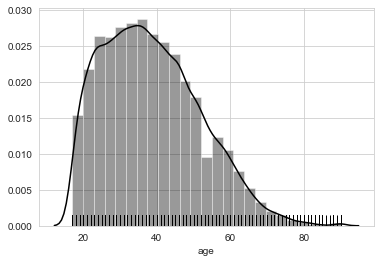

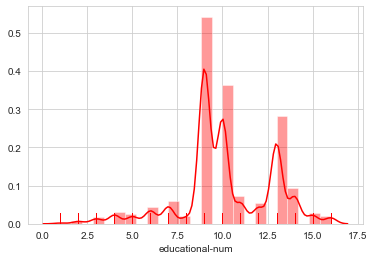

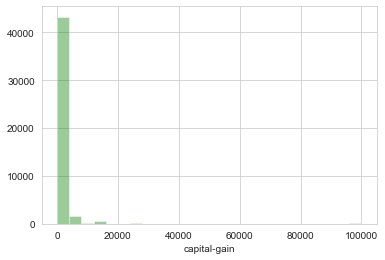

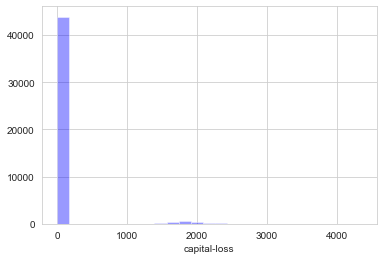

In [53]:
sbn.distplot(a['age'],rug=True,color='k',bins=25);plt.show()
sbn.distplot(a['educational-num'],rug=True,color='r',bins=25);plt.show()
sbn.distplot(a['capital-gain'],kde=False,color='g',bins=25);plt.show()
sbn.distplot(a['capital-loss'],kde=False,color='b',bins=25);plt.show()

## BOXPLOT PLOTTING USING MATPLOTLIB 

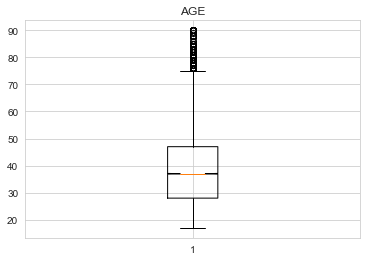

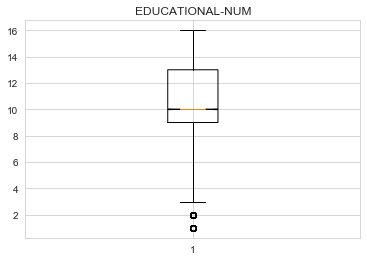

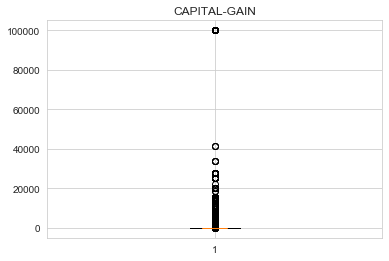

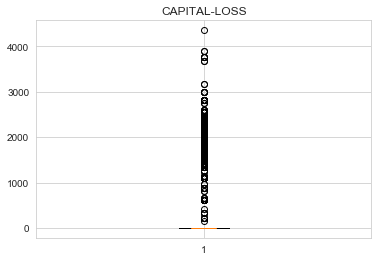

In [54]:
plt.title('AGE')
plt.boxplot(a['age'],notch=True)
plt.show()
plt.title('EDUCATIONAL-NUM')
plt.boxplot(a['educational-num'],notch=True)
plt.show()
plt.title('CAPITAL-GAIN')
plt.boxplot(a['capital-gain'],notch=True)
plt.show()
plt.title('CAPITAL-LOSS')
plt.boxplot(a['capital-loss'],notch=True)
plt.show()

## HISTOGRAM PLOTTING

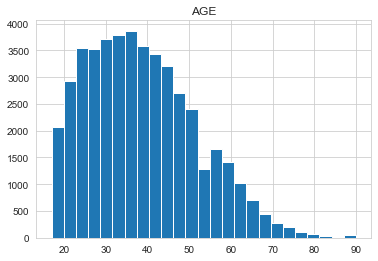

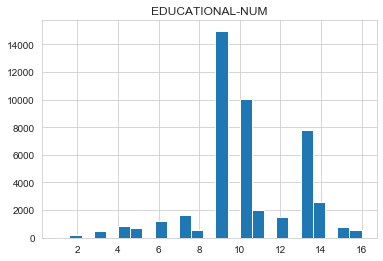

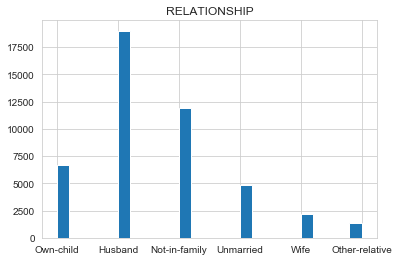

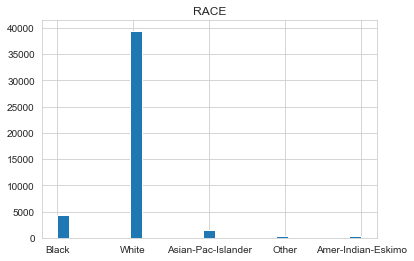

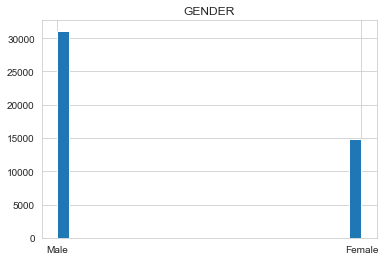

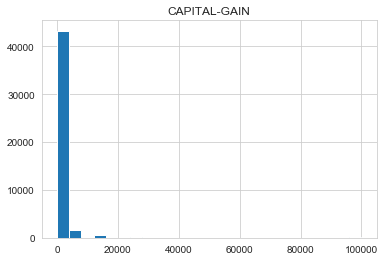

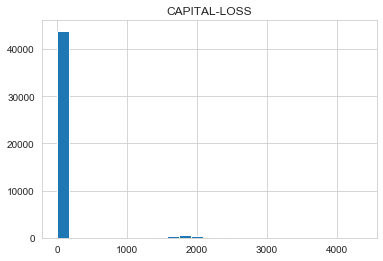

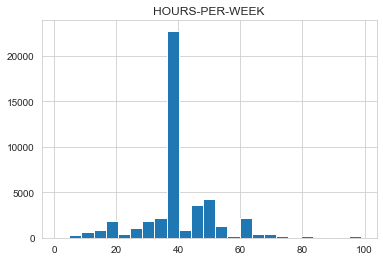

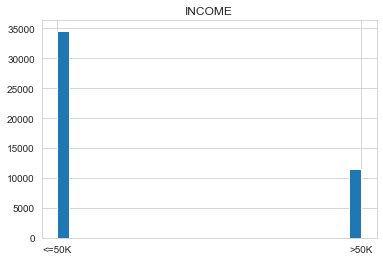

In [55]:
plt.title("AGE");plt.hist(a['age'],bins=25,histtype='barstacked');plt.show();
plt.title("EDUCATIONAL-NUM");plt.hist(a['educational-num'],bins=25,histtype='barstacked');plt.show();
plt.title("RELATIONSHIP");plt.hist(a['relationship'],bins=25,histtype='barstacked');plt.show();
plt.title("RACE");plt.hist(a['race'],bins=25,histtype='barstacked');plt.show();
plt.title("GENDER");plt.hist(a['gender'],bins=25,histtype='barstacked');plt.show();
plt.title("CAPITAL-GAIN");plt.hist(a['capital-gain'],bins=25,histtype='barstacked');plt.show();
plt.title("CAPITAL-LOSS");plt.hist(a['capital-loss'],bins=25,histtype='barstacked');plt.show();
plt.title("HOURS-PER-WEEK");plt.hist(a['hours-per-week'],bins=25,histtype='barstacked');plt.show();
plt.title("INCOME");plt.hist(a['income'],bins=25,histtype='barstacked');plt.show();

## PDF PLOT

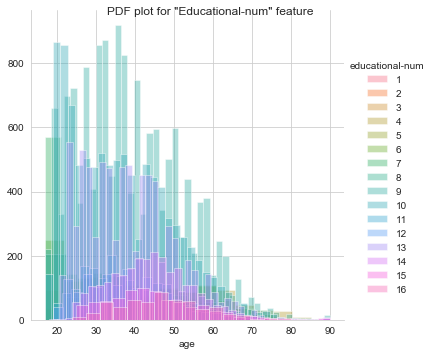

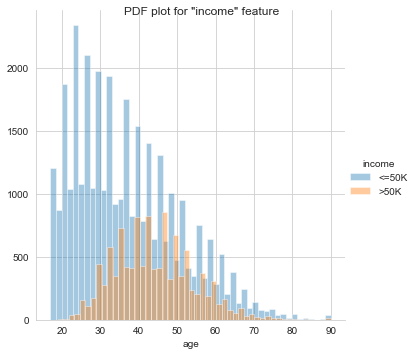

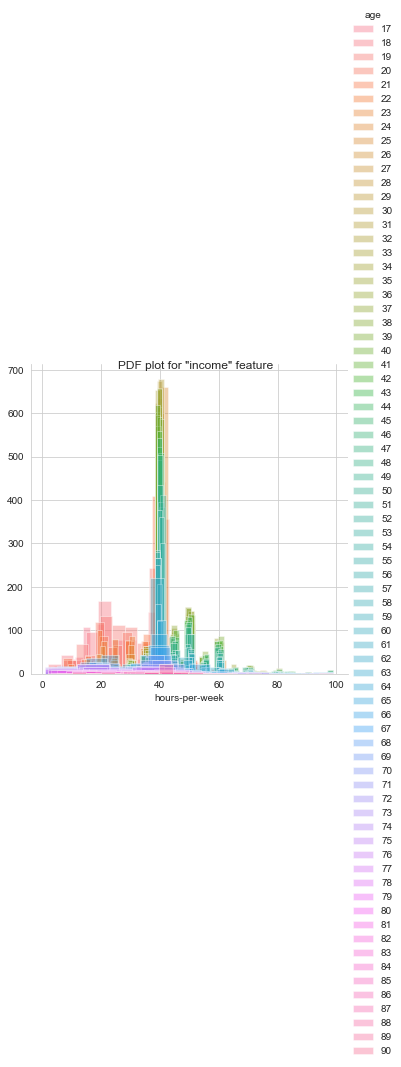

In [56]:
sbn.FacetGrid(a, hue="educational-num", size=5) \
   .map(sbn.distplot, "age",kde=False) \
   .add_legend().fig.suptitle('PDF plot for "Educational-num" feature');
plt.show();
sbn.FacetGrid(a, hue="income", size=5) \
   .map(sbn.distplot, "age",kde=False) \
   .add_legend().fig.suptitle('PDF plot for "income" feature');
plt.show();
sbn.FacetGrid(a, hue="age", size=5) \
   .map(sbn.distplot, "hours-per-week",kde=False) \
   .add_legend().fig.suptitle('PDF plot for "income" feature');
plt.show();


## VIOLIN PLOT

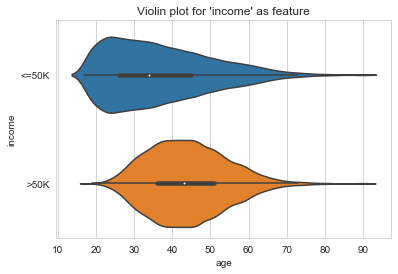

In [57]:
sbn.violinplot(x="age", y="income", data=a, size=8)
plt.title("Violin plot for 'income' as feature")

plt.show()


## Observation

#### -Graphs having the age columns analysis by hist,box,displot... by boxplot it identified there are so many outlier and it identifes the outlier and dataset having 50% of age 35 max is 75 and 75% is 55 of age¶ 

#### -Graph is education num in which this all plot can see that in kde the peak at 10 and the dist plot also convey that but having outilear and 50% is also plot or get at the frequency of 10 .Dataset may differ at between 8 - 12

#### -The graph of hours per week in which boxplot take the observation that dataset frequency is between 30 - 50.

# Bivariate

## PAIR PLOTTING USING SEABORN

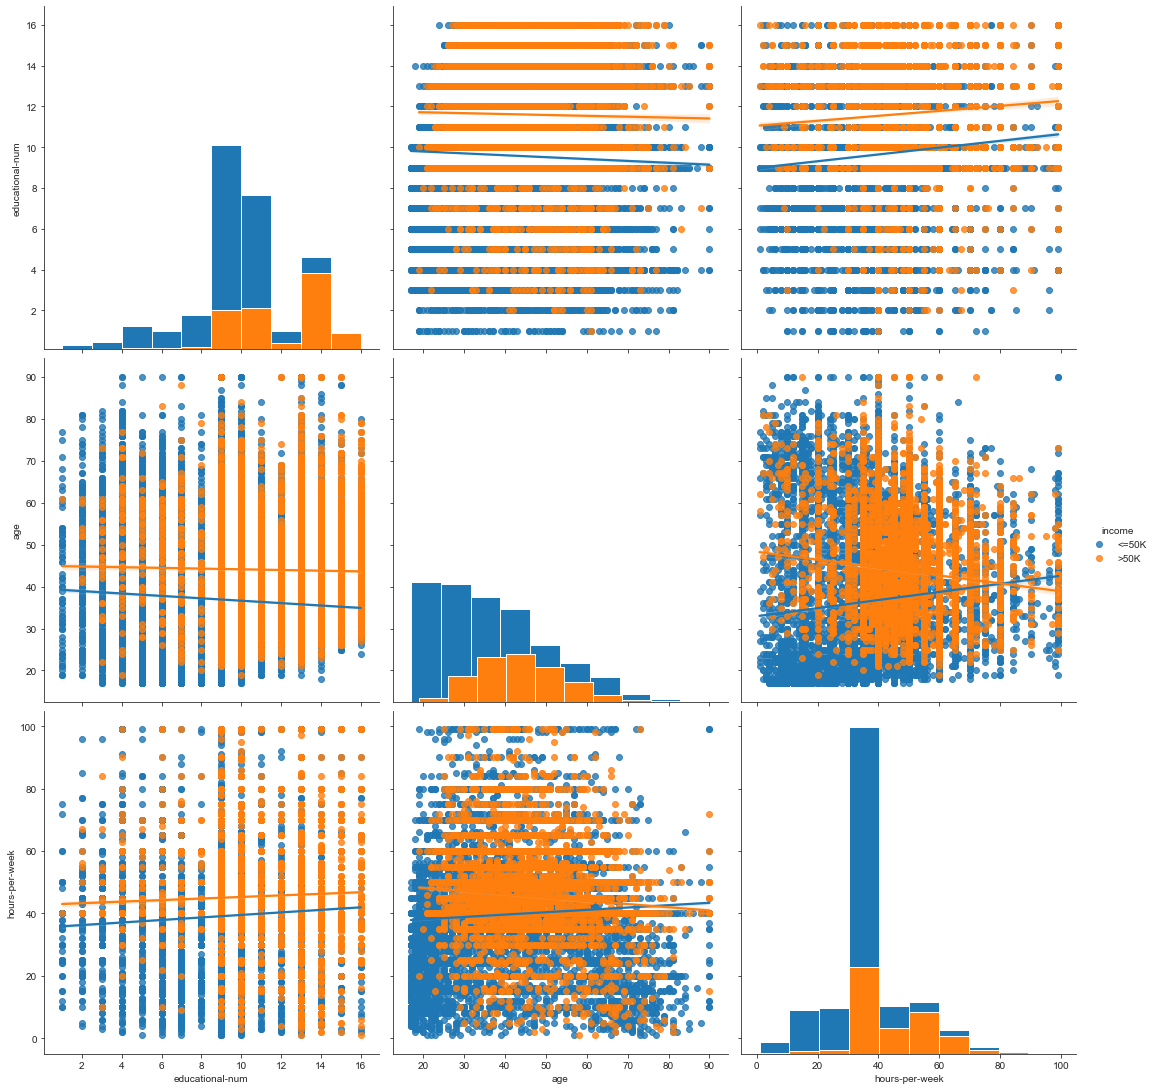

In [62]:
plt.close();
sbn.set_style("ticks");
sbn.pairplot(data=a, hue="income", size=5,vars=['educational-num','age','hours-per-week'],kind='reg',diag_kind='hist');
plt.show()

## JOINT PLOT

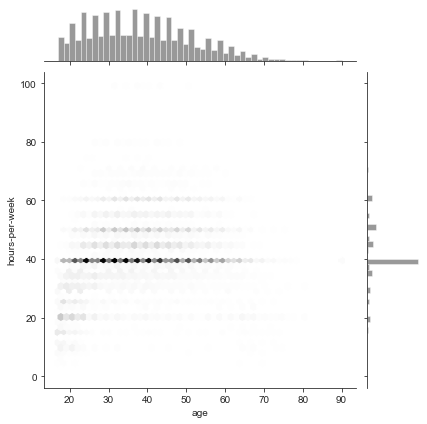

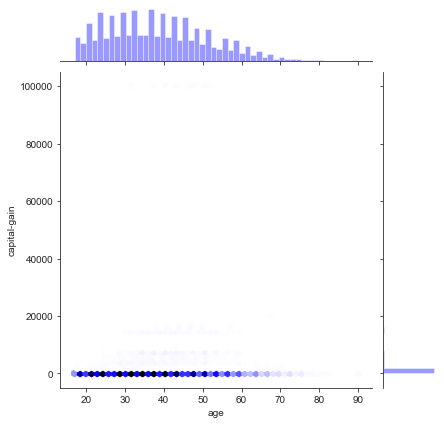

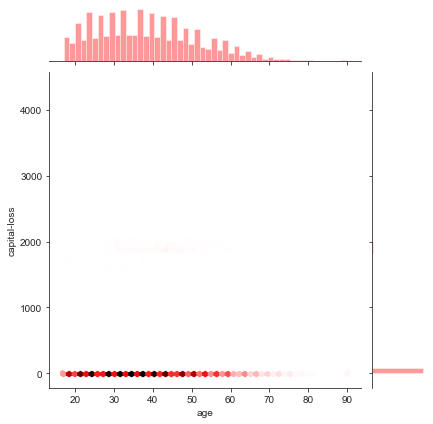

In [59]:
sbn.jointplot(x='age',y='hours-per-week',data=a,kind='hex',color='k')
plt.show()
sbn.jointplot(x='age',y='capital-gain',data=a,kind='hex',color='b')
plt.show()
sbn.jointplot(x='age',y='capital-loss',data=a,kind='hex',color='r')
plt.show()

## BOX PLOT USING SEABORN

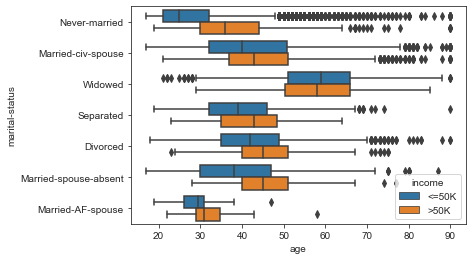

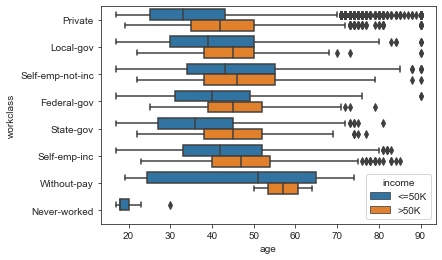

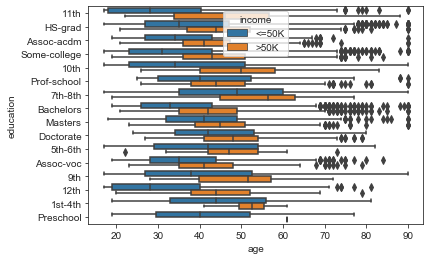

In [63]:
sbn.boxplot(data=a,x='age',y='marital-status',hue='income')
plt.show()
sbn.boxplot(data=a ,x='age',y='workclass',hue='income')
plt.show()
sbn.boxplot(data=a,x='age',y='education',hue='income')
plt.show()

In [64]:
a.corr()

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037872,0.079934,0.059495,0.102475
educational-num,0.037872,1.000000,0.126393,0.081498,0.145291
capital-gain,0.079934,0.126393,1.000000,-0.032135,0.082990
capital-loss,0.059495,0.081498,-0.032135,1.000000,0.055580
hours-per-week,0.102475,0.145291,0.082990,0.055580,1.000000


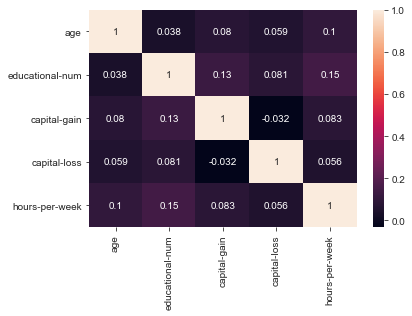

In [65]:
plt.figure()
sbn.heatmap(a.corr(),annot=True)

## Observations

#### -The heatmap convery that the columns correlation are not that much that they can get plot on graph but the column get plot and we try with pair and scatter plot.

# conclusion

#### -There is no strong correlation among mumerical columns.
#### -Most of the workers can be seen working for 30 hours to 40 hours per week.
#### -Most of them works in private sector.
#### -Educational-num attribute is not affecting the target most.
#### -Capital-gain and Capital-loss can be zero.
#### -Captial Gain and Capital Loss attribute have most of the outliers.
#### -Most of the employee are male.
#### -Females who earns <=50k have more flexible working hours per week whereas males who earn >50K have more flexible working hours per week.
#### -Employeers who earns >50k have flexible working hours.
#### -Age group of 20-90 are working.
#### -Almost 90% of them are from United-States.
#### -Income is dependent on hours-per-week.
#### -Neither of the numerical column follows normal distribution except age which is positively skewed.
#### -Most of the individuals are well-educated completed their graduation, masters, etc.
#### -The ratio of married-spouse is greatest among all.

In [67]:
from sklearn import preprocessing

In [68]:
y = a.columns
print(y)

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


In [69]:
features = a.iloc[:,[0,3,9,10,11]].values
features

array([[   25,     7,     0,     0,    40],
       [   38,     9,     0,     0,    50],
       [   28,    12,     0,     0,    40],
       ...,
       [   58,     9,     0,     0,    40],
       [   22,     9,     0,     0,    20],
       [   52,     9, 15024,     0,    40]], dtype=int64)

In [70]:
min_max_scaler = preprocessing.MinMaxScaler()
feature_scaler = min_max_scaler.fit_transform(features)
feature_scaler

array([[0.10958904, 0.4       , 0.        , 0.        , 0.39795918],
       [0.28767123, 0.53333333, 0.        , 0.        , 0.5       ],
       [0.15068493, 0.73333333, 0.        , 0.        , 0.39795918],
       ...,
       [0.56164384, 0.53333333, 0.        , 0.        , 0.39795918],
       [0.06849315, 0.53333333, 0.        , 0.        , 0.19387755],
       [0.47945205, 0.53333333, 0.1502415 , 0.        , 0.39795918]])

In [72]:
numerical = pd.DataFrame({'age': feature_scaler[:, 0], 'educational-num': feature_scaler[:, 1], 'capital-gain': feature_scaler[:,2],'capital-loss': feature_scaler[:,3],'hours-per-week': feature_scaler[:,4]})
numerical

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.400000,0.000000,0.0,0.397959
1,0.287671,0.533333,0.000000,0.0,0.500000
2,0.150685,0.733333,0.000000,0.0,0.397959
3,0.369863,0.600000,0.076881,0.0,0.397959
4,0.232877,0.333333,0.000000,0.0,0.295918
...,...,...,...,...,...
46038,0.136986,0.733333,0.000000,0.0,0.377551
46039,0.315068,0.533333,0.000000,0.0,0.397959
46040,0.561644,0.533333,0.000000,0.0,0.397959
46041,0.068493,0.533333,0.000000,0.0,0.193878
